In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

In [54]:
import mlflow

In [55]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/workspaces/MLOps/01-intro/mlruns/1', creation_time=1727861727997, experiment_id='1', last_update_time=1727861727997, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

In [6]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [7]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [9]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0 days 00:00:04


In [10]:
df.duration = df.duration.apply(lambda ld : ld.total_seconds()/60)

In [11]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


In [12]:
df.duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: duration, dtype: float64

In [13]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

#### **98% 56.000000 : Most of the trip (98%) duration is within an Hour**
#### we should focus in that range only

In [14]:
df = df[(df.duration >= 1.0) & (df.duration <= 60.0)]

In [15]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [16]:
df.duration.mean()

np.float64(16.852578430841948)

<Axes: xlabel='duration', ylabel='Density'>

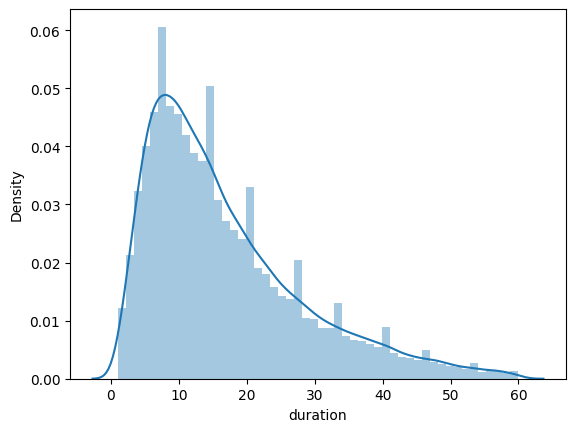

In [17]:
sns.distplot(df.duration)

In [18]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       35733
RatecodeID               35733
PULocationID                 0
DOLocationID                 0
passenger_count          35733
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                73908
improvement_surcharge        0
total_amount                 0
payment_type             35733
trip_type                35733
congestion_surcharge     35733
duration                     0
dtype: int64

In [19]:
df.drop(columns=['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge'],inplace=True)

In [20]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PULocationID             0
DOLocationID             0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
duration                 0
dtype: int64

In [21]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.01,5.5,0.5,0.5,0.00,0.0,0.3,6.80,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,2.53,10.0,0.5,0.5,2.81,0.0,0.3,16.86,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.12,6.0,0.5,0.5,1.00,0.0,0.3,8.30,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,168,75,1.99,8.0,0.5,0.5,0.00,0.0,0.3,9.30,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,75,75,0.45,3.5,0.5,0.5,0.96,0.0,0.3,5.76,2.316667


In [22]:
df = df.reset_index()

In [23]:
xvars = ['PULocationID','DOLocationID','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']
yvars = ['duration']

In [24]:
Xtrain = df[xvars]
ytrain = df[yvars]

In [25]:
Xtrain

,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,43,151,1.01,5.50,0.50,0.5,0.00,0.00,0.3,6.80
1,166,239,2.53,10.00,0.50,0.5,2.81,0.00,0.3,16.86
2,41,42,1.12,6.00,0.50,0.5,1.00,0.00,0.3,8.30
3,168,75,1.99,8.00,0.50,0.5,0.00,0.00,0.3,9.30
4,75,75,0.45,3.50,0.50,0.5,0.96,0.00,0.3,5.76
...,...,...,...,...,...,...,...,...,...,...
73903,81,90,17.63,56.23,2.75,0.0,0.00,6.12,0.3,65.40
73904,35,213,18.36,46.66,0.00,0.0,12.20,6.12,0.3,65.28
73905,74,69,2.50,18.95,2.75,0.0,0.00,0.00,0.3,22.00
73906,168,215,14.48,48.87,2.75,0.0,0.00,6.12,0.3,58.04


In [26]:
Xtrain.dtypes

PULocationID               int64
DOLocationID               int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [27]:
Xtrain.head()

,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,43,151,1.01,5.5,0.5,0.5,0.00,0.0,0.3,6.80
1,166,239,2.53,10.0,0.5,0.5,2.81,0.0,0.3,16.86
2,41,42,1.12,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,168,75,1.99,8.0,0.5,0.5,0.00,0.0,0.3,9.30
4,75,75,0.45,3.5,0.5,0.5,0.96,0.0,0.3,5.76


In [28]:
ytrain.head()

,duration
0,3.933333
1,8.750000
2,5.966667
3,7.083333
4,2.316667


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error as RMSE 


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train) 
# Predict the model 
pred = lr.predict(X_test) 

# RMSE Computation 
rmse = RMSE(y_test, pred)
print("RMSE : % f" %(rmse)) 

RMSE :  44.236770


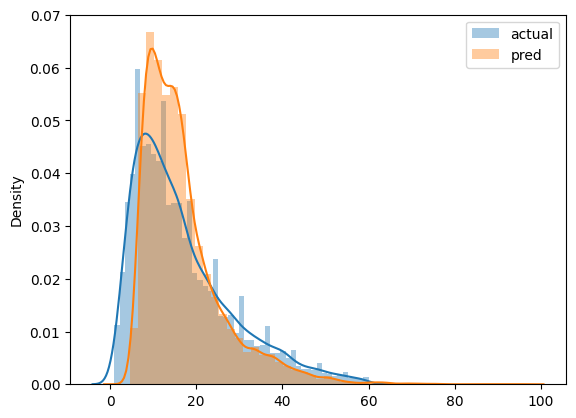

In [34]:

sns.distplot(y_test,kde=True,label='actual')
sns.distplot(pred,kde=True,label='pred')
plt.legend()


## Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lsr = Lasso(alpha=0.01)

In [36]:
lsr.fit(X_train, y_train) 
# Predict the model 
pred = lsr.predict(X_test) 

# RMSE Computation 
rmse = RMSE(y_test, pred)
print("RMSE : % f" %(rmse)) 

RMSE :  44.326169


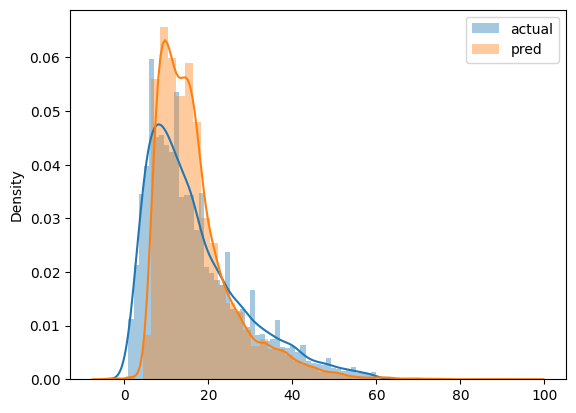

In [37]:
sns.distplot(y_test,kde=True,label='actual')
sns.distplot(pred,kde=True,label='pred')
plt.legend()

## XGBoost

In [38]:
import xgboost as xgb

In [40]:

with mlflow.start_run():
    mlflow.set_tag()
    xgb_r = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
    # Fitting the model 
    xgb_r.fit(X_train, y_train) 
    # Predict the model 
    pred = xgb_r.predict(X_test) 

    # RMSE Computation 
    rmse = RMSE(y_test, pred)
    print("RMSE : % f" %(rmse)) 

RMSE :  23.352337


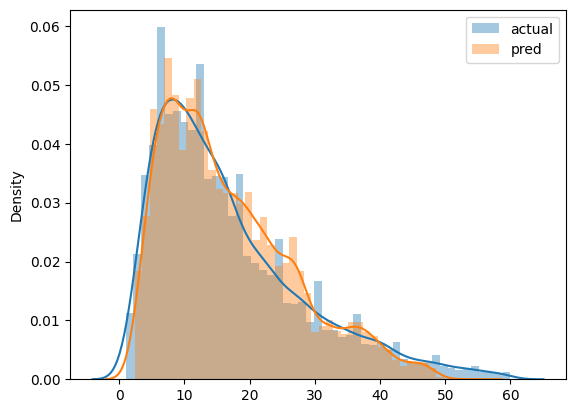

In [41]:
sns.distplot(y_test,kde=True,label='actual')
sns.distplot(pred,kde=True,label='pred')
plt.legend()

## Save the Model

In [42]:
import pickle

In [45]:
# Save the model to a file
with open('models/XGBLR_Model.pkl', 'wb') as file:
    pickle.dump(xgb_r, file)

## Load Model and Predict

In [46]:
# Load the model back
with open('models/XGBLR_Model.pkl', 'rb') as file:
    xgb_r_loaded = pickle.load(file)

# Predict with the loaded model
pred = xgb_r_loaded.predict(X_test)
# RMSE Computation 
rmse = RMSE(y_test, pred)
print("RMSE : % f" %(rmse)) 

RMSE :  23.352337
